<a href="https://colab.research.google.com/github/Swarn36/Finance_Related/blob/main/Options.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Option Pricing

In [1]:
from scipy import stats
import numpy as np

def call_option_price(S, E, T, rf, sigma):
  d1 = (np.log(S/E) + (rf + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
  d2 = d1 - sigma * np.sqrt(T)

  print(f'd1 and d2 are : {d1}, {d2}')

  return S*stats.norm.cdf(d1) - E*np.exp(-rf*T)*stats.norm.cdf(d2)

def put_option_price(S, E, T, rf, sigma):
  d1 = (np.log(S/E) + (rf + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
  d2 = d1 - sigma * np.sqrt(T)

  print(f'd1 and d2 are : {d1}, {d2}')

  return -S*stats.norm.cdf(-d1) + E*np.exp(-rf*T)*stats.norm.cdf(-d2)


if __name__ == '__main__':

  S = 100
  E = 100
  T = 1
  rf = .05
  sigma = 0.2
  print(f'Call option price: ${call_option_price(S, E, T, rf, sigma)}')
  print(f'Put option price: ${put_option_price(S, E, T, rf, sigma)}')

d1 and d2 are : 0.35000000000000003, 0.15000000000000002
Call option price: $10.450583572185565
d1 and d2 are : 0.35000000000000003, 0.15000000000000002
Put option price: $5.573526022256971


#Monte Carlo Simulations

             0          1          2          3          4          5  \
0    50.000000  50.000000  50.000000  50.000000  50.000000  50.000000   
1    50.204939  48.636903  50.515387  51.248421  50.207028  49.746807   
2    50.829450  49.062214  50.134825  51.732051  50.008794  49.845835   
3    50.922720  49.178702  50.648710  52.529805  50.085751  49.682211   
4    50.578182  49.593440  50.551870  51.996732  49.920375  50.252410   
..         ...        ...        ...        ...        ...        ...   
248  45.966125  68.387348  55.303432  49.785668  53.411869  52.775661   
249  45.638163  68.999566  54.837982  50.493864  53.847219  52.131028   
250  45.772077  70.003546  54.713429  49.745991  53.917766  51.781033   
251  45.574309  71.349556  54.152402  49.978706  54.103630  51.262539   
252  46.156197  71.515786  54.263874  50.277646  54.306954  51.381043   

             6          7          8          9  ...         91         92  \
0    50.000000  50.000000  50.000000  50.0000

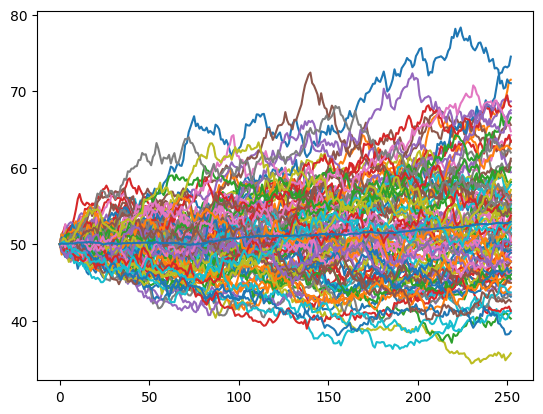

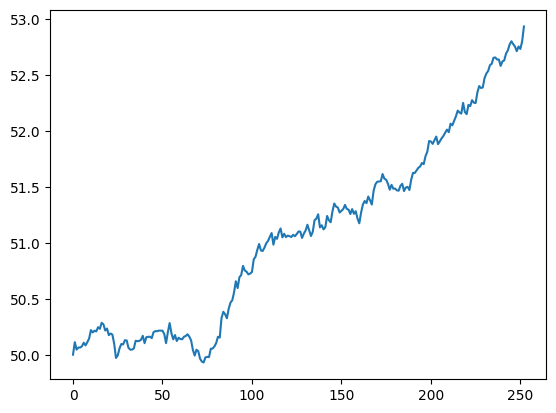

Prediction of the year end price : $52.94


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

NUM_OF_SIMULATIONS = 100

def monte_carlo_simulations(S0, mu, sigma, N=252):
  result = []

  for _ in range(NUM_OF_SIMULATIONS):
    prices = [S0]
    for _ in range(N):
      stock_price = prices[-1]*np.exp((mu - 0.5*sigma**2) + sigma*np.random.normal())
      prices.append(stock_price)

    result.append(prices)

  simulation_data = pd.DataFrame(result)
  simulation_data = simulation_data.T
  #print(f'{simulation_data}')
  simulation_data['mean'] = simulation_data.mean(axis=1)
  print(simulation_data)
  plt.plot(simulation_data)
  plt.show()

  plt.plot(simulation_data['mean'])
  plt.show()
  print("Prediction of the year end price : $%.2f" %simulation_data['mean'].tail(1))


if __name__ == '__main__':
  monte_carlo_simulations(50, 0.0002, .01)

##Option Price with simulations

In [3]:
import numpy as np

class OptionPricing:

  def __init__(self, S0, E, T, rf, sigma, iterations):
    self.S0 = S0
    self.E = E
    self.T = T
    self.rf = rf
    self.sigma = sigma
    self.iter = iterations

  def call_option_simulation(self):
    option_data = np.zeros([self.iter, 2])
    rand = np.random.normal(0, 1,[1, self.iter])

    stock_price = self.S0 * np.exp((self.rf - 0.5*self.sigma**2)*self.T + self.sigma*np.sqrt(self.T)*rand)
    option_data[:, 1] = stock_price - self.E
    average = np.sum(np.amax(option_data, axis=1)) / float(self.iter)

    return np.exp(-self.rf*self.T)*average

  def put_option_simulation(self):
    option_data = np.zeros([self.iter, 2])
    rand = np.random.normal(0, 1,[1, self.iter])

    stock_price = self.S0 * np.exp((self.rf - 0.5*self.sigma**2)*self.T + self.sigma*np.sqrt(self.T)*rand)
    option_data[:, 1] = self.E - stock_price
    average = np.sum(np.amax(option_data, axis=1)) / float(self.iter)

    return np.exp(-self.rf*self.T)*average

if __name__ == '__main__':
  model = OptionPricing(100, 100, 2, 0.05, 0.2, 1000)
  print("Value of the call option: $%.2f" %model.call_option_simulation())
  print("Value of the put option: $%.2f" %model.put_option_simulation())

Value of the call option: $17.39
Value of the put option: $6.24
